# Heart Failure Prediction

### Preface from Kaggle 
<br>
https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

About the dataset:
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

***Acknowledgements***

Citation
Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). (link)

License
CC BY 4.0

Splash icon
Icon by Freepik, available on Flaticon.

Splash banner
Wallpaper by jcomp, available on Freepik.

## Examine the documentation and identify goals

The information listed on Kaggle page links to the publication this dataset originates from. If we take a look, we can gleam a few insights immediately:

[Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone by Davide Chicco and Giuseppe Jurman](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5)


The background detail some important information. The dataset was used in biostatistics study from 2017 where the cases were produced from the medical records of 299 Pakistani patients having heart failure. The 2017 study utilized the dataset to hypothesize two biostatistical sex-based models to predict heart failure mortality. Chicco and Giuseppe however aimed to use machine learning techniques to predict mortality rates from heart failure. 

They were able to produce accurate predictions by only using two features: ejection fraction and serum creatinine. These two metrics are known to be predictors of heart failure.

The dataset sections specify a few things that should be noted about our dataset:
- These patients were all hospitalized at the Faisalabad Institute of Cardiology and at the Allied Hospital in Faisalabad in Punjab, Pakistan
- These data were all collected during April - December 2015
- The dataset has 104 women and 194 men with an age of 40 to 95 years old
- All patients had left ventricular systolic dysfunction and had previous heart failures
- There are 13 features: Age, Anaemia (bool), High Blood Pressure (bool), Creatine Phophoskinase, Diabetes (bool), Ejection Fraction, Sex (bool), Platelets, Serum Creatinine, Serum Sodium, Smoking (bool), Time (follow-up period in days), and our target, Death Event (bool)

Given this contextual information from the I identify my main goal for this notebook:

### Create models to predict heart failure in these patients and verify the accuracy of reducing the amount of variables used to make these predictions

To determine the answer to this question I will follow the below steps:
1. Load the dataset and identify the features included in the dataset
2. Explore the dataset and find any trends or correlations with the features
3. Preprocess the dataset for modeling
4. Create models with all the features in the dataset
5. Identify important features and produce models only including these features
6. Create models with only ejection fraction and serum creatinine
7. Compare the performances of all the models created

## Import modules and load datasets

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# ml modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
import xgboost

**Load input data**

In [3]:
heart_data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

**Initial Exploration**

First, the data should be examined in as many ways as possible first. There will be some correlations and properties that we can guess using background knowledge but viewing the shape of the dataset and plotting the data will help gleam new insights.

We can start with viewing the head and shape of the data

In [4]:
heart_data.shape

(299, 13)

There are 13 rows and 299 rows. Let's examine columns and their content.

In [5]:
heart_data.head(8)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1


In [6]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
heart_data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
heart_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


The above functions allow us to see that this dataset is complete with no null values. The researchers behind the source study have already cleaned the dataset so this is expected

In [75]:
#group by death event
heart_data.groupby(by="DEATH_EVENT").count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


The researchers pointed out the features Ejection Fraction and Serum Creatinine as important predictors so let's take a closer look at them.

In [93]:
heart_data[['DEATH_EVENT','ejection_fraction','serum_creatinine']].groupby('DEATH_EVENT').mean()

,ejection_fraction,serum_creatinine
DEATH_EVENT,,
0,40.26601,1.184877
1,33.46875,1.835833


The mean for ejection fraction is lower for patients that did not survive and the serum creatinine on average is higher

A good next step would be produce a correlation heatmap of all the features.

                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   
DEATH_EVENT               0.253729  0.

Text(0.5, 1.0, 'Correlation Matrix')

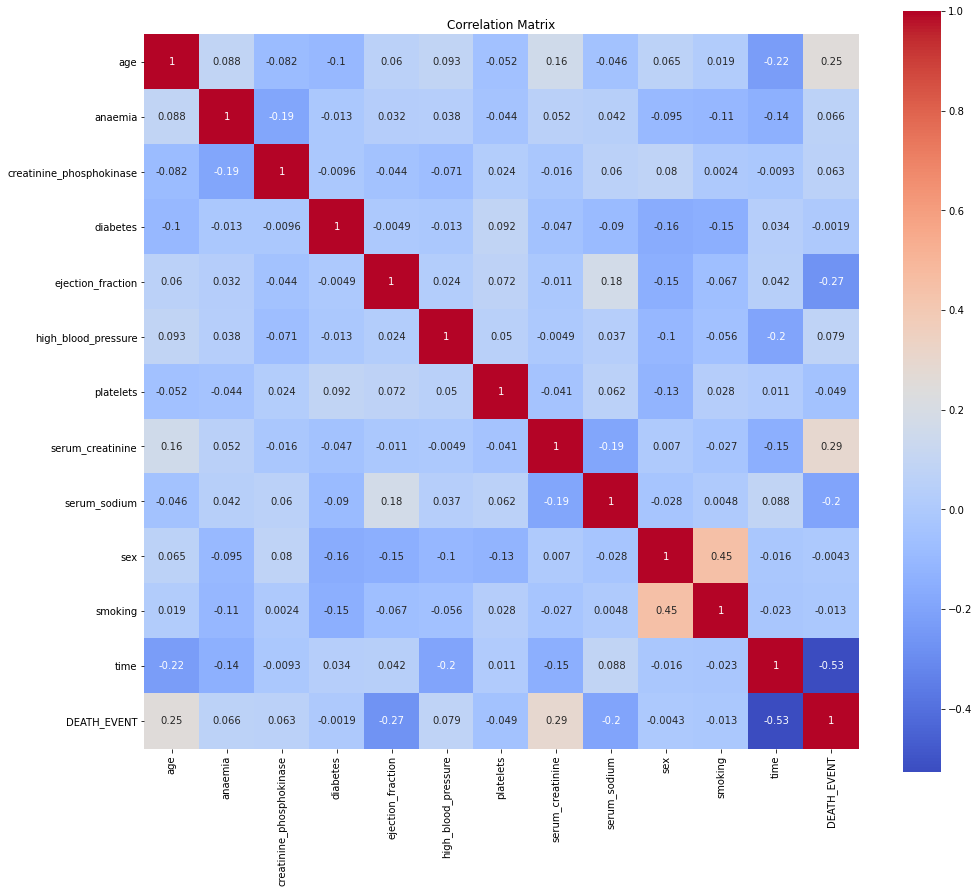

In [9]:
plt.figure(figsize=(16,14))
print(heart_data.corr())
hmp = sns.heatmap(heart_data.corr(method='pearson'), square= True, annot=True, cmap='coolwarm')
hmp.set_title('Correlation Matrix')

In [94]:
# display the correlations in another form. View the relevant correlation pairs only
corr_pairs = heart_data.corr().unstack().sort_values(kind="quicksort")
relevant_pairs = corr_pairs[abs(corr_pairs) > 0.25]
print(relevant_pairs)

DEATH_EVENT               time                       -0.526964
time                      DEATH_EVENT                -0.526964
ejection_fraction         DEATH_EVENT                -0.268603
DEATH_EVENT               ejection_fraction          -0.268603
                          age                         0.253729
age                       DEATH_EVENT                 0.253729
serum_creatinine          DEATH_EVENT                 0.294278
DEATH_EVENT               serum_creatinine            0.294278
sex                       smoking                     0.445892
smoking                   sex                         0.445892
age                       age                         1.000000
platelets                 platelets                   1.000000
smoking                   smoking                     1.000000
sex                       sex                         1.000000
serum_sodium              serum_sodium                1.000000
serum_creatinine          serum_creatinine            1

**Takeaways:**

- Time of a patient's follow-up period is important in determining a patient's outcome. It has an inverse relationship.
- Age, ejection fraction, and serum creatinine also are correlated with adverse death outcomes.
- There seems to be a correlation between sex and smoking

## Plotting out the categorical and numerical functions

In [11]:
cat_col = ['anaemia', 'high_blood_pressure', 'diabetes', 'sex', 'smoking']
num_col = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'platelets','time']

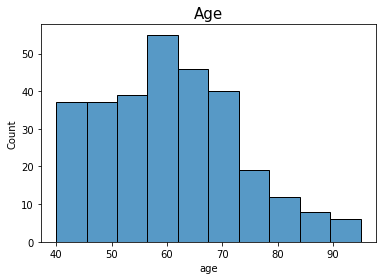

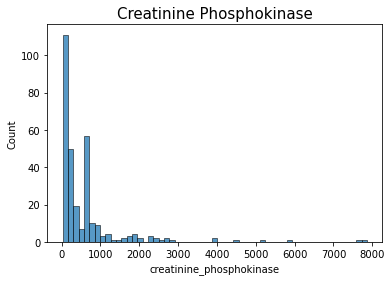

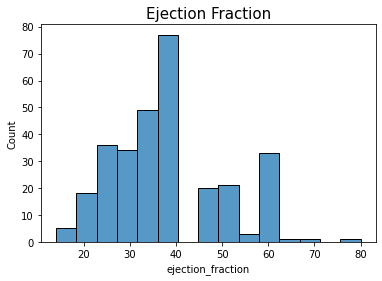

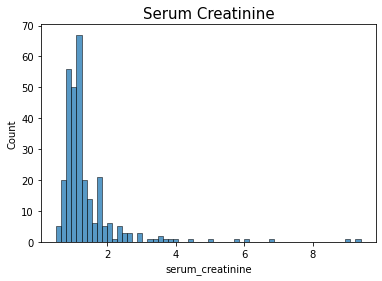

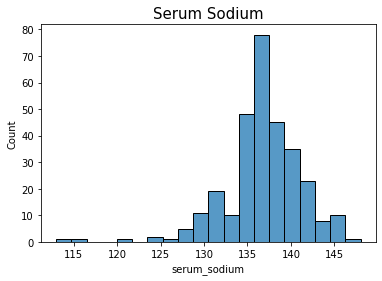

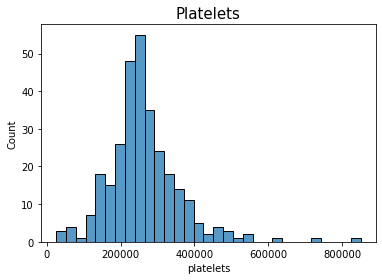

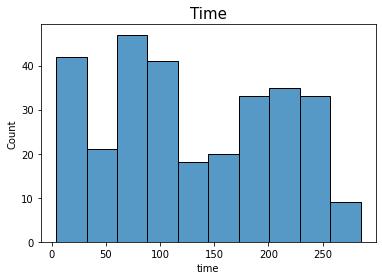

In [12]:
for col in num_col:
    sns.histplot(data=heart_data[col], kde=False)
    plt.title(col.replace('_', ' ').title(), fontsize=15)
    plt.show()

The distributions of most of the numeric features are fairly normal. Creatine phosphokinase can be normalized to aid in modeling

Let's take a look at the average of the features for each value of the death event. 

In [13]:
pd.pivot_table(heart_data, index = 'DEATH_EVENT', values = num_col, aggfunc='mean')

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
DEATH_EVENT,,,,,,,
0,58.761906,540.054187,40.26601,266657.489901,1.184877,137.216749,158.339901
1,65.215281,670.197917,33.46875,256381.044792,1.835833,135.375000,70.885417


The above table shows that patients with a death event tend to have higher ages, higher creatinine phosphokinase levels, high serum creatinine levels, and lower ejection fractions.

This is interesting because the correlation heatmap didn't indicate a correlation between creatinine phophokinase and death events so there may be several outliers that are response for this phenomena.

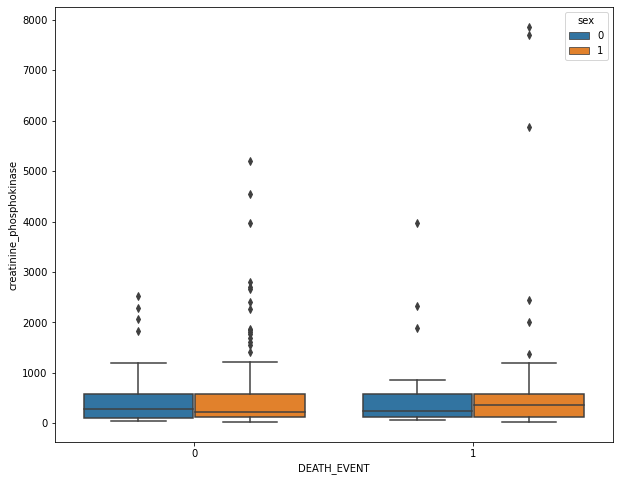

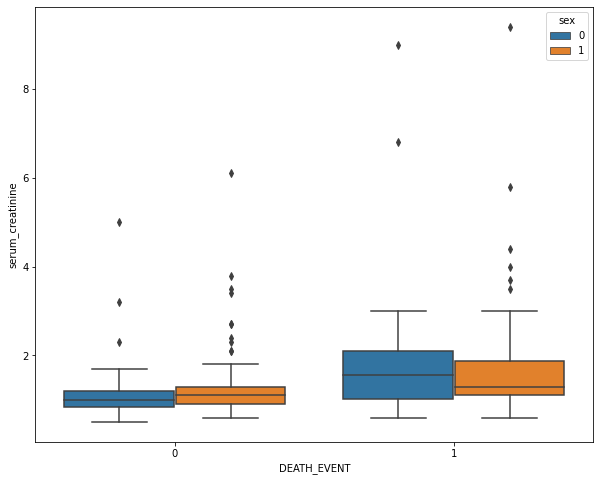

In [14]:
plt.figure(figsize=(10,8))
sns.boxplot(data = heart_data, x='DEATH_EVENT', y='creatinine_phosphokinase', hue='sex')
plt.show()

plt.figure(figsize=(10,8))
sns.boxplot(data = heart_data, x='DEATH_EVENT', y='serum_creatinine', hue='sex')
plt.show()

There are in fact a lot of outliers! However, it might not be wise to remove them from our dataset. These outliers are outside the *normal* range. It's important to note that all these subjects have had **at least one heart failure** so which may explain the wide range of values as their health was affected by that event.

<br>
Age and ejection fraction have also been identified as important features so they'd be worth further exploration. Let's examine their swarm plots with the death events in the x-axis

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

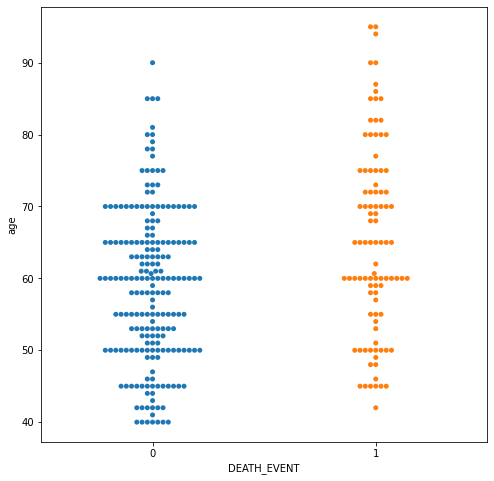

In [15]:
plt.figure(figsize=(8,8))
sns.swarmplot(x=heart_data['DEATH_EVENT'], y=heart_data['age'])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

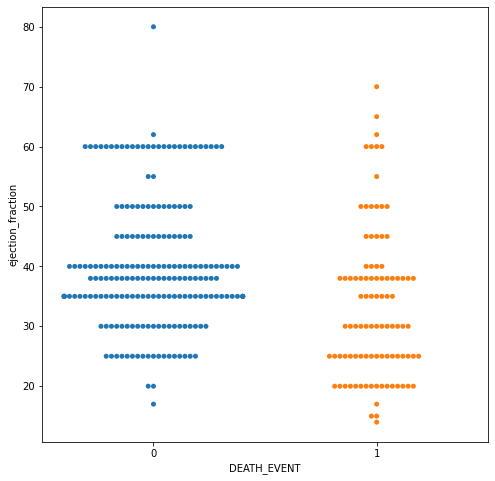

In [16]:
plt.figure(figsize=(8,8))
sns.swarmplot(x=heart_data['DEATH_EVENT'], y=heart_data['ejection_fraction'])

In order to get a sense of the categorical values and their effect on death event numbers, plotting them in a pie chart to get a sense of proportion seems appropriate

The following code creates functions that handle the generation of the pie charts

In [95]:
def make_autopct(values):
    """
    Returns a function to be used to display both percentage and count in pie charts
    """
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

#generic create piechart
def create_binary_pie_chart(feature1, feature2, data, labels):
    '''
    Create a pie chart from two different binary categories in a dataset
    feature1, feature2 - column headers as strings
    data - dataframe
    '''
    df_split1 = data[data[feature1] == 1]
    df_split2 = data[data[feature1] == 0]
    
    df1 = df_split1[df_split1[feature2]==0]
    df2 = df_split1[df_split1[feature2]==1]
    df3 = df_split2[df_split2[feature2]==0]
    df4 = df_split2[df_split2[feature2]==1]
    
    values = [len(df1),len(df2),len(df3), len(df4)]
    
    plt.figure(figsize=(12,10))
    plt.pie(values, autopct=make_autopct(values), textprops={'fontsize': 12,
                                                             'color': 'w',
                                                                'weight': 'bold'})
    plt.title(f'{feature1.title().replace("_"," ")} vs {feature2.title().replace("_"," ")}', fontdict = {'fontweight': 'bold',
                                                                                                        'fontsize': 14})
    plt.legend(labels=labels, loc='upper right')

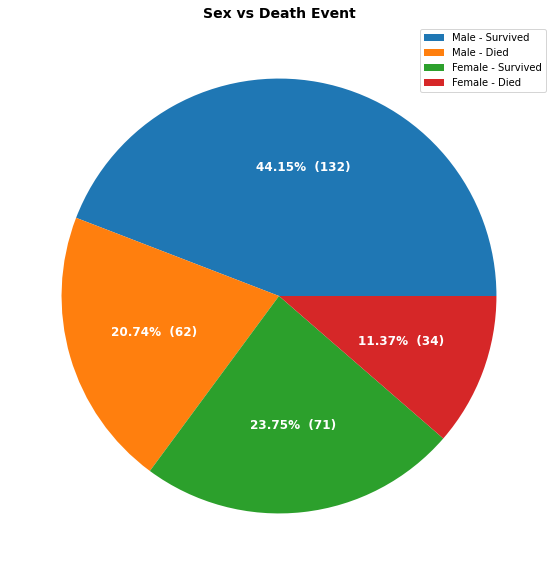

In [18]:
create_binary_pie_chart('sex', 'DEATH_EVENT', heart_data, ['Male - Survived','Male - Died','Female - Survived', 'Female - Died'])
plt.show()

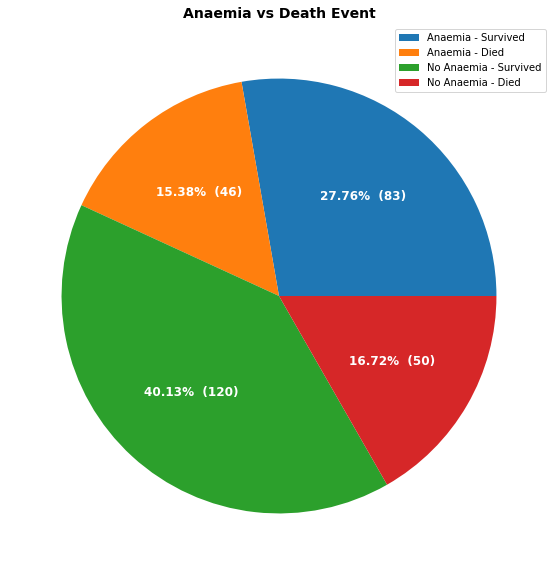

In [19]:
create_binary_pie_chart('anaemia', 'DEATH_EVENT', heart_data, ['Anaemia - Survived','Anaemia - Died','No Anaemia - Survived', 'No Anaemia - Died'])
plt.show()

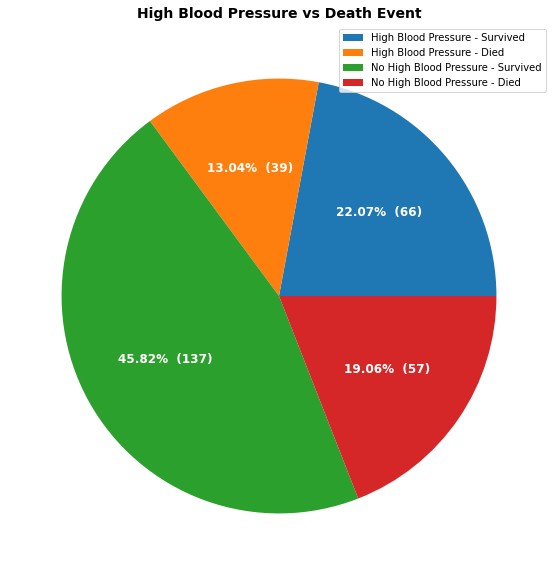

In [20]:
create_binary_pie_chart('high_blood_pressure', 'DEATH_EVENT', heart_data, ['High Blood Pressure - Survived','High Blood Pressure - Died','No High Blood Pressure - Survived', 'No High Blood Pressure - Died'])
plt.show()

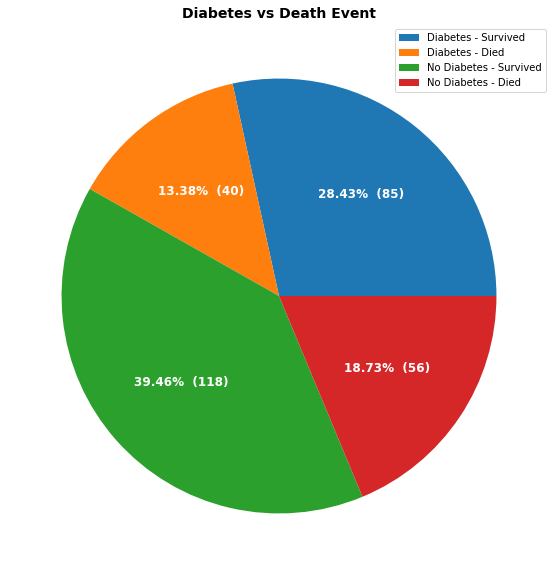

In [21]:
create_binary_pie_chart('diabetes', 'DEATH_EVENT', heart_data, ['Diabetes - Survived','Diabetes - Died','No Diabetes - Survived', 'No Diabetes - Died'])
plt.show()

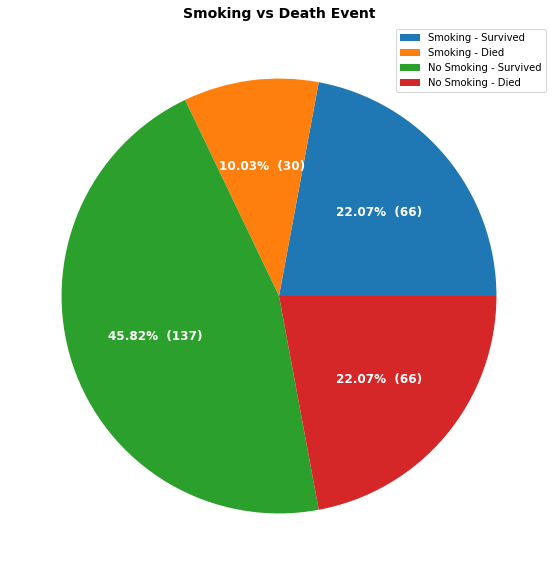

In [22]:
create_binary_pie_chart('smoking', 'DEATH_EVENT', heart_data, ['Smoking - Survived','Smoking - Died','No Smoking - Survived', 'No Smoking - Died'])
plt.show()

**Takeaways**

- There doesn't seem to a variable that overwhelmingly causes worse outcomes in these patients which can probably be explained given the population

## Preprocessing for modeling

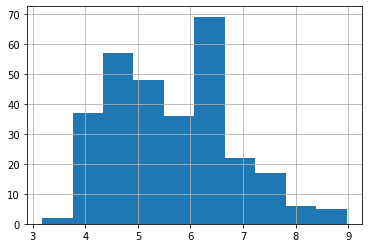

In [24]:
#normalize the non-normal features
heart_data_norm = heart_data.copy()
heart_data_norm['norm_creatinine_phosphokinase'] = np.log(heart_data.creatinine_phosphokinase+1)
heart_data_norm['norm_creatinine_phosphokinase'].hist()
heart_data_norm.drop(labels='creatinine_phosphokinase', inplace=True, axis = 1)

In [25]:
#scale the features
cols = list(heart_data_norm.columns)
s_scaler = preprocessing.StandardScaler()
heart_data_scaled= s_scaler.fit_transform(heart_data_norm)
heart_data_scaled = pd.DataFrame(heart_data_norm, columns=cols)   
heart_data_scaled.describe()

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,norm_creatinine_phosphokinase
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000,299.000000
mean,60.833893,0.431438,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107,5.665785
std,11.894809,0.496107,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767,1.129494
min,40.000000,0.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000,3.178054
25%,51.000000,0.000000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000,4.766357
50%,60.000000,0.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000,5.525453
75%,70.000000,1.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000,6.368187
max,95.000000,1.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000,8.969796


In [26]:
#split data frame into test and train sets
features = ['age', 'anaemia', 'norm_creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking','time']
X = heart_data_norm[features]
y = heart_data_norm['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [27]:
accuracy_scores_all_feat = []

## Modeling with all features

**Naive Bayes**

In [28]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
gnb_acc = accuracy_score(y_test, y_pred_gnb)
accuracy_scores_all_feat.append(100*gnb_acc)

In [29]:
print(f'Accuracy of Naive Bayes is {gnb_acc * 100:.2f}%')

Accuracy of Naive Bayes is 76.67%


**Logistic Regression**

In [30]:
lr = LogisticRegression(max_iter = 2000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred_lr)
accuracy_scores_all_feat.append(100*lr_acc)

In [31]:
print(f'Accuracy of Logistic Regression is {lr_acc * 100:.2f}%')

Accuracy of Logistic Regression is 75.00%


**Decision Tree**

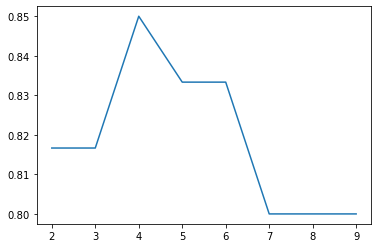

In [32]:
#find the optimum number of max_leaf_nodes
params = []
for leaves in range(2,10):
    dtree_class = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=1)
    dtree_class.fit(X_train, y_train)
    dtree_pred = dtree_class.predict(X_test)
    params.append(accuracy_score(y_test,dtree_pred))
plt.plot(list(range(2,10)), params)
plt.show()

4 appears to be the right max leaf nodes for this model

In [33]:
dt = tree.DecisionTreeClassifier(max_leaf_nodes = 4,random_state = 1)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)
accuracy_scores_all_feat.append(100*dt_acc)

In [34]:
print(f'Accuracy of Decision Tree is {dt_acc * 100:.2f}%')

Accuracy of Decision Tree is 85.00%


**K-Nearest Neighbors**

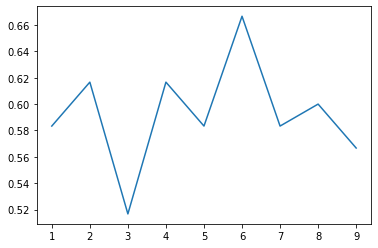

In [35]:
# find optimal neighbors
neighbors = []
for n in range(1,10):
    KN_class = KNeighborsClassifier(n_neighbors=n)
    KN_class.fit(X_train, y_train)
    y_pred_kn_class =  KN_class.predict(X_test)
    neighbors.append(accuracy_score(y_test, y_pred_kn_class))
plt.plot(list(range(1,10)), neighbors)
plt.show()

Looks like 6 is the optimal amount of neighbors

In [36]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)
accuracy_scores_all_feat.append(100*knn_acc)

In [37]:
print(f'Accuracy of K-Nearest Neighbors is {knn_acc * 100:.2f}%')

Accuracy of K-Nearest Neighbors is 66.67%


**Random Forest**

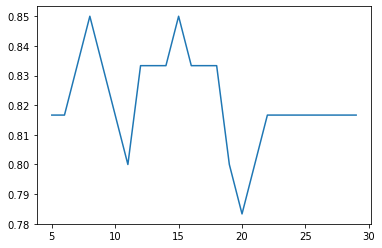

In [38]:
params = []
for estimator_amt in range(5,30):
    rf_class = RandomForestClassifier(n_estimators = estimator_amt, random_state=1)
    rf_class.fit(X_train, y_train)
    rf_y_pred = rf_class.predict(X_test)
    params.append(accuracy_score(y_test,rf_y_pred))
plt.plot(list(range(5,30)), params)
plt.show()

15 looks to be the right amount of estimators

In [39]:
rf = RandomForestClassifier(n_estimators=15, random_state = 1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
accuracy_scores_all_feat.append(100*rf_acc)

In [40]:
print(f'Accuracy of Random Forest is {rf_acc * 100:.2f}%')

Accuracy of Random Forest is 85.00%


**Support Vector Classifier**

In [41]:
svc = SVC(probability = True)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
svc_acc = accuracy_score(y_test, y_pred_svc)
accuracy_scores_all_feat.append(100*svc_acc)

In [42]:
print(f'Accuracy of Support Vector Classifier is {svc_acc * 100:.2f}%')

Accuracy of Support Vector Classifier is 61.67%


**XGBoost Classifier**

C:\Users\Malcolm\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


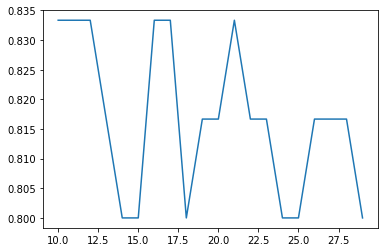

In [43]:
params = []
for estimators in range(10,30,1):
    xg_class = xgboost.XGBClassifier(n_estimators = estimators, max_depth=12, subsample=0.7,eval_metric ='error')
    xg_class.fit(X_train, y_train)
    xg_opt_pred = xg_class.predict(X_test)
    params.append(accuracy_score(y_test,xg_opt_pred))
plt.plot(list(range(10,30,1)), params)
plt.show()

10 looks like a good fit for our number of estimators

In [44]:
xgb = xgboost.XGBClassifier(max_depth=12, random_state=1, n_estimators=10,eval_metric ='error')
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
accuracy_scores_all_feat.append(100*xgb_acc)

In [45]:
print(f'Accuracy of XGBoost Classifier is {xgb_acc * 100:.2f}%')

Accuracy of XGBoost Classifier is 83.33%


In [46]:
models = ['Naive Bayes', 'Logistic Regression', 'DecisionTree', 'K-Nearest Neighbors', 'RandomForest',
             'SVC', 'XGBoost']

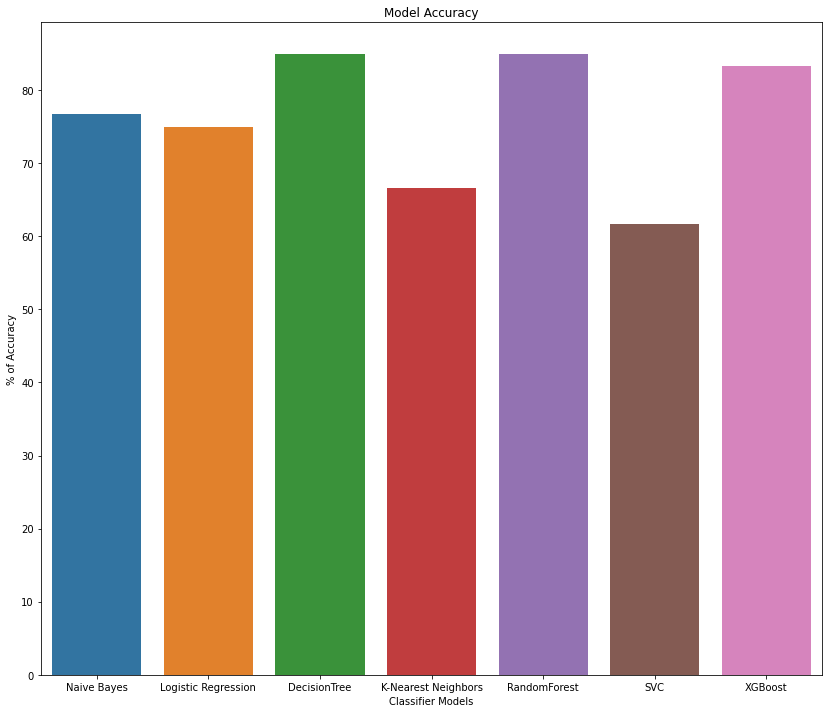

In [47]:
plt.figure(figsize=(14,12))
sns.barplot(x=models, y=accuracy_scores_all_feat)

plt.xlabel('Classifier Models')
plt.ylabel('% of Accuracy')
plt.title('Model Accuracy')
plt.show()

## Modeling with Reduced Features

[0.09219079 0.02554253 0.07408896 0.02988943 0.13316432 0.02106755
 0.0744857  0.12446397 0.08126315 0.02660807 0.02857748 0.28865805]


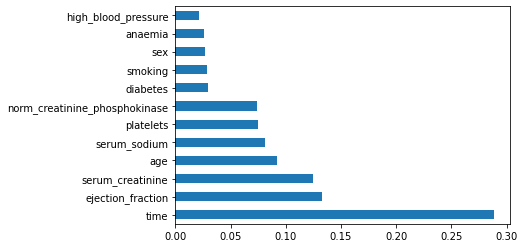

In [48]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind = "barh")
plt.show()

It appears the most important features in terms of importance are:
- Age
- Serum Creatinine
- Ejection Fracton
- Time

We should compare our original model with one with this reduced features

In [49]:
X_train = X_train[['age','serum_creatinine','ejection_fraction','time']]
X_test = X_test[['age','serum_creatinine','ejection_fraction','time']]

accuracy_scores_reduced_feat = []

In [50]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
gnb_acc = accuracy_score(y_test, y_pred_gnb)
accuracy_scores_reduced_feat.append(100*gnb_acc)

print(f'Accuracy of Naive Bayes with reduced features is {gnb_acc * 100:.2f}%')

Accuracy of Naive Bayes with reduced features is 81.67%


In [51]:
lr = LogisticRegression(max_iter = 2000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred_lr)
accuracy_scores_reduced_feat.append(100*lr_acc)

print(f'Accuracy of Logistic Regression with reduced features is {lr_acc * 100:.2f}%')

Accuracy of Logistic Regression with reduced features is 80.00%


In [52]:
dt = tree.DecisionTreeClassifier(max_leaf_nodes = 4,random_state = 1)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)
accuracy_scores_reduced_feat.append(100*dt_acc)

print(f'Accuracy of Decision Tree with reduced features is {dt_acc * 100:.2f}%')

Accuracy of Decision Tree with reduced features is 85.00%


In [53]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)
accuracy_scores_reduced_feat.append(100*knn_acc)

print(f'Accuracy of K-Nearest Neighbors with reduced features is {knn_acc * 100:.2f}%')

Accuracy of K-Nearest Neighbors with reduced features is 85.00%


In [54]:
rf = RandomForestClassifier(n_estimators=15, random_state = 1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
accuracy_scores_reduced_feat.append(100*rf_acc)

print(f'Accuracy of Random Forest with reduced features is {rf_acc * 100:.2f}%')

Accuracy of Random Forest with reduced features is 83.33%


In [55]:
svc = SVC(probability = True)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
svc_acc = accuracy_score(y_test, y_pred_svc)
accuracy_scores_reduced_feat.append(100*svc_acc)

print(f'Accuracy of Support Vector Classifier with reduced features is {svc_acc * 100:.2f}%')

Accuracy of Support Vector Classifier with reduced features is 83.33%


In [56]:
xgb = xgboost.XGBClassifier(max_depth=12, random_state=1, n_estimators=10,eval_metric ='error')
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
accuracy_scores_reduced_feat.append(100*xgb_acc)

print(f'Accuracy of XGBoost Classifier with reduced features is {xgb_acc * 100:.2f}%')

Accuracy of XGBoost Classifier with reduced features is 83.33%


C:\Users\Malcolm\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


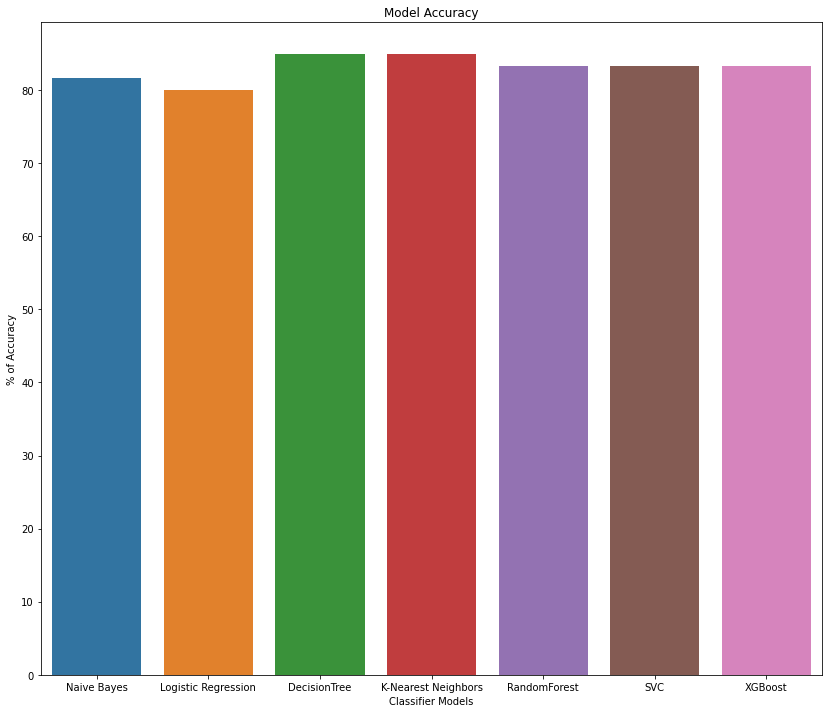

In [57]:
models = ['Naive Bayes', 'Logistic Regression', 'DecisionTree', 'K-Nearest Neighbors', 'RandomForest',
             'SVC', 'XGBoost']

plt.figure(figsize=(14,12))
sns.barplot(x=models, y=accuracy_scores_reduced_feat)

plt.xlabel('Classifier Models')
plt.ylabel('% of Accuracy')
plt.title('Model Accuracy')
plt.show()

In the study, the researchers determined that only ejection fraction and serum creatinine were needed to predict outcomes. Let's give that a try with our models.

## Modeling with Serum Creatinine and Ejection Fraction only

In [58]:
X_train = X_train[['serum_creatinine','ejection_fraction']]
X_test = X_test[['serum_creatinine','ejection_fraction']]

accuracy_scores_two_feat = []

In [59]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
gnb_acc = accuracy_score(y_test, y_pred_gnb)
accuracy_scores_two_feat.append(100*gnb_acc)

print(f'Accuracy of Naive Bayes with serum creatinine and ejection fraction is {gnb_acc * 100:.2f}%')

Accuracy of Naive Bayes with serum creatinine and ejection fraction is 65.00%


In [60]:
lr = LogisticRegression(max_iter = 2000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred_lr)
accuracy_scores_two_feat.append(100*lr_acc)

print(f'Accuracy of Logistic Regression with serum creatinine and ejection fraction reduced features is {lr_acc * 100:.2f}%')

Accuracy of Logistic Regression with serum creatinine and ejection fraction reduced features is 73.33%


In [61]:
dt = tree.DecisionTreeClassifier(max_leaf_nodes = 4,random_state = 1)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)
accuracy_scores_two_feat.append(100*dt_acc)

print(f'Accuracy of Decision Tree with serum creatinine and ejection fraction reduced features is {dt_acc * 100:.2f}%')

Accuracy of Decision Tree with serum creatinine and ejection fraction reduced features is 70.00%


In [62]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)
accuracy_scores_two_feat.append(100*knn_acc)

print(f'Accuracy of K-Nearest Neighbors with serum creatinine and ejection fraction reduced features is {knn_acc * 100:.2f}%')

Accuracy of K-Nearest Neighbors with serum creatinine and ejection fraction reduced features is 76.67%


In [63]:
rf = RandomForestClassifier(n_estimators=15, random_state = 1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
accuracy_scores_two_feat.append(100*rf_acc)

print(f'Accuracy of Random Forest with serum creatinine and ejection fraction reduced features is {rf_acc * 100:.2f}%')

Accuracy of Random Forest with serum creatinine and ejection fraction reduced features is 65.00%


In [64]:
svc = SVC(probability = True)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
svc_acc = accuracy_score(y_test, y_pred_svc)
accuracy_scores_two_feat.append(100*svc_acc)

print(f'Accuracy of Support Vector Classifier with serum creatinine and ejection fraction reduced features is {svc_acc * 100:.2f}%')

Accuracy of Support Vector Classifier with serum creatinine and ejection fraction reduced features is 66.67%


In [65]:
xgb = xgboost.XGBClassifier(max_depth=12, random_state=1, n_estimators=10,eval_metric ='error')
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
accuracy_scores_two_feat.append(100*xgb_acc)

print(f'Accuracy of XGBoost Classifier with serum creatinine and ejection fraction reduced features is {xgb_acc * 100:.2f}%')

Accuracy of XGBoost Classifier with serum creatinine and ejection fraction reduced features is 66.67%


C:\Users\Malcolm\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


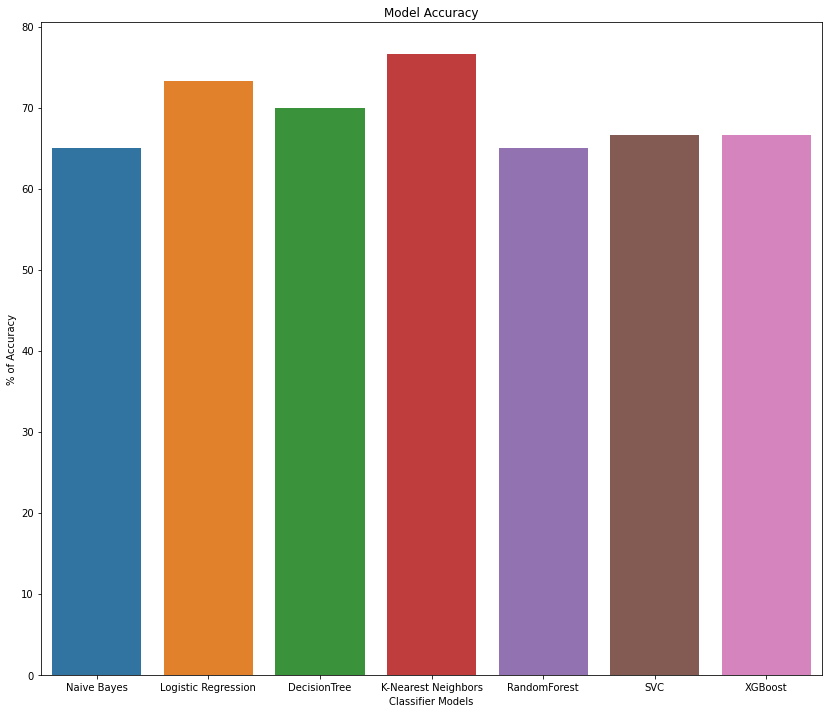

In [66]:
models = ['Naive Bayes', 'Logistic Regression', 'DecisionTree', 'K-Nearest Neighbors', 'RandomForest',
             'SVC', 'XGBoost']

plt.figure(figsize=(14,12))
sns.barplot(x=models, y=accuracy_scores_two_feat)

plt.xlabel('Classifier Models')
plt.ylabel('% of Accuracy')
plt.title('Model Accuracy')
plt.show()

In [67]:
print(sum(accuracy_scores_all_feat)/len(accuracy_scores_all_feat))
print(sum(accuracy_scores_reduced_feat)/len(accuracy_scores_reduced_feat))
print(sum(accuracy_scores_two_feat)/len(accuracy_scores_two_feat))

76.19047619047619
83.0952380952381
69.04761904761904


Below is a plot of our first, second and third attempts. Looks like for how our models were set up the best scores we received were from the second attempt with four features.

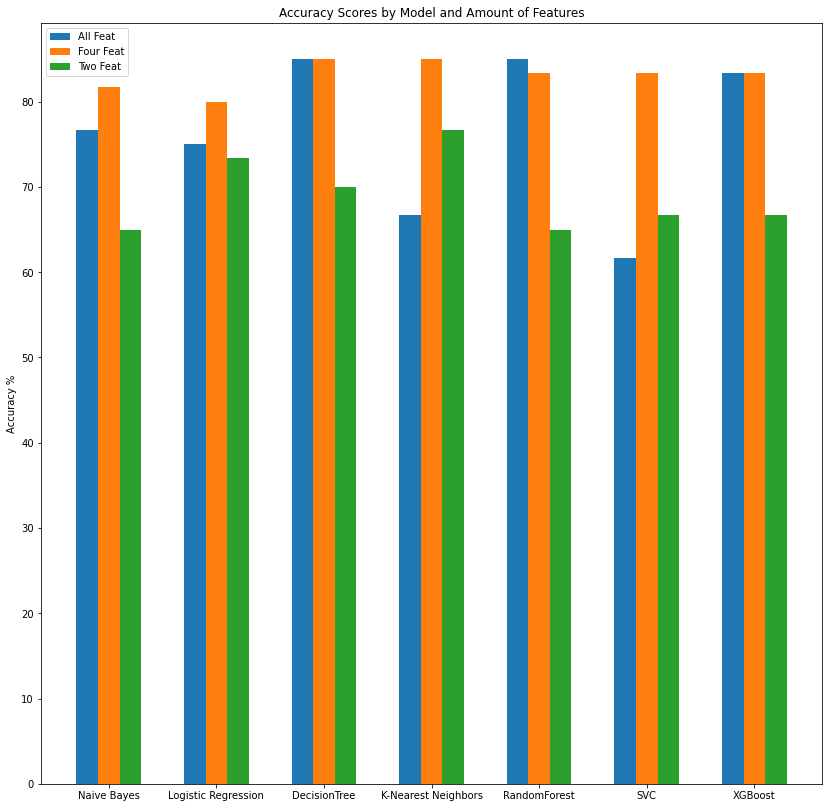

In [68]:
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

plt.figure(figsize=(14,14))

plt.bar(x - (width), accuracy_scores_all_feat, width, label='All Feat')
plt.bar(x, accuracy_scores_reduced_feat, width, label='Four Feat')
plt.bar(x + (width), accuracy_scores_two_feat, width, label='Two Feat')


plt.ylabel('Accuracy %')
plt.title('Accuracy Scores by Model and Amount of Features')
plt.xticks(x, models)
plt.legend(['All Feat','Four Feat','Two Feat'])
plt.show()